In [9]:
import pandas as pd

data = pd.read_csv("Bakery Sales.csv.xls")

print(data.head())
print(data.info())
print(data.describe())

           datetime day of week    total place  angbutter  plain bread  jam  \
0  2019-07-11 15:35        Thur  23800.0   NaN        1.0          NaN  NaN   
1  2019-07-11 16:10        Thur  15800.0   NaN        1.0          NaN  NaN   
2  2019-07-12 11:49         Fri  58000.0   NaN        NaN          NaN  NaN   
3  2019-07-13 13:19         Sat  14800.0   NaN        1.0          1.0  NaN   
4  2019-07-13 13:22         Sat  15600.0   NaN        2.0          NaN  NaN   

   americano  croissant  caffe latte  ...  gateau chocolat  pandoro  \
0        1.0        NaN          NaN  ...              NaN      NaN   
1        NaN        NaN          NaN  ...              NaN      NaN   
2        NaN        NaN          NaN  ...              NaN      NaN   
3        NaN        NaN          NaN  ...              NaN      NaN   
4        NaN        NaN          NaN  ...              NaN      NaN   

   cheese cake  lemon ade  orange pound  wiener  vanila latte  berry ade  \
0          NaN        

In [13]:
#data cleaning 
data.columns = data.columns.str.lower().str.replace(" ", "_")
data['datetime'] = pd.to_datetime(data['datetime'])
print(data.isnull().sum())
data = data.fillna(0)

datetime               233
day_of_week            234
total                  234
place                  488
angbutter              681
plain_bread           1797
jam                   2434
americano             2242
croissant             1907
caffe_latte           2461
tiramisu_croissant    1875
cacao_deep            2331
pain_au_chocolat      2067
almond_croissant      2452
croque_monsieur       2654
mad_garlic            2654
milk_tea              2517
gateau_chocolat       2458
pandoro               2311
cheese_cake           2564
lemon_ade             2619
orange_pound          2135
wiener                2299
vanila_latte          2445
berry_ade             2600
tiramisu              2647
merinque_cookies      2607
dtype: int64


In [36]:
# Total revenue
total_revenue = data['total'].sum()
print(f"Total Revenue: {total_revenue}")

# Most selling items
item_columns = data.columns[4:] 
item_data = data[item_columns]

item_totals = item_data.sum().sort_values(ascending=False)

print("Top selling items:\n", item_totals)

Total Revenue: 51237500.0
Top-selling items:
 hour                  30793.0
angbutter              3229.0
croissant              1049.0
plain_bread            1028.0
tiramisu_croissant      945.0
pain_au_chocolat        726.0
orange_pound            566.0
americano               513.0
wiener                  476.0
pandoro                 394.0
cacao_deep              364.0
jam                     249.0
vanila_latte            241.0
almond_croissant        235.0
caffe_latte             214.0
gateau_chocolat         210.0
milk_tea                160.0
cheese_cake              92.0
berry_ade                55.0
merinque_cookies         49.0
lemon_ade                38.0
tiramisu                  7.0
mad_garlic                0.0
croque_monsieur           0.0
dtype: float64


In [21]:
#data cleaning
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
print(data['datetime'].isnull().sum()) 
data = data.dropna(subset=['datetime'])

data['hour'] = data['datetime'].dt.hour
print(data[['datetime', 'hour']].head())
print(data[data['datetime'].isnull()])

0
             datetime  hour
0 2019-07-11 15:35:00    15
1 2019-07-11 16:10:00    16
2 2019-07-12 11:49:00    11
3 2019-07-13 13:19:00    13
4 2019-07-13 13:22:00    13
Empty DataFrame
Columns: [datetime, day_of_week, total, place, angbutter, plain_bread, jam, americano, croissant, caffe_latte, tiramisu_croissant, cacao_deep, pain_au_chocolat, almond_croissant, croque_monsieur, mad_garlic, milk_tea, gateau_chocolat, pandoro, cheese_cake, lemon_ade, orange_pound, wiener, vanila_latte, berry_ade, tiramisu, merinque_cookies, hour]
Index: []

[0 rows x 28 columns]


In [38]:
#orders by day of the week
orders_by_day = data['day_of_week'].value_counts()
print("Orders by day:\n", orders_by_day)
#orders hourly
data['hour'] = data['datetime'].dt.hour

orders_by_hour = data['hour'].value_counts().sort_index()
print("Orders by hour:\n", orders_by_hour)

Orders by day:
 day_of_week
Sun     554
Sat     452
Thur    385
Wed     360
Fri     334
Mon     332
0       234
Tues      3
Name: count, dtype: int64
Orders by hour:
 hour
0     233
11    706
12    552
13    446
14    344
15    219
16    125
17     27
22      1
23      1
Name: count, dtype: int64


In [25]:
# Orders by place
orders_by_place = data['place'].value_counts()
print("Orders by place:\n", orders_by_place)


Orders by place:
 place
0        488
동면       416
후평 2동    254
후평 3동    249
후평 1동    196
석사동      169
퇴계동      146
효자 2동    143
소양동      132
신사우동      91
효자 3동     80
교동        65
강남동       52
효자 1동     50
조운동       37
동내면       31
근화동       29
약사명동      23
교동         2
신동면        1
Name: count, dtype: int64


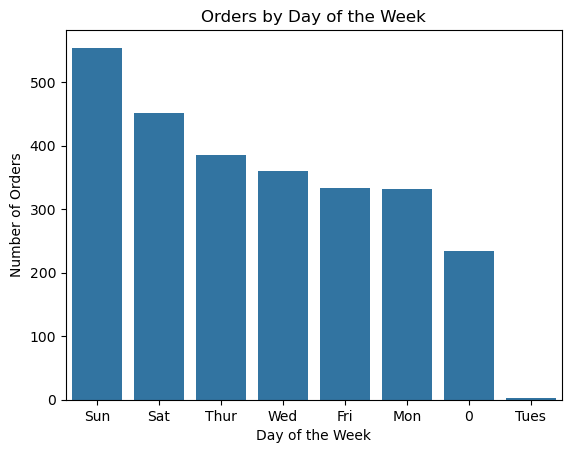

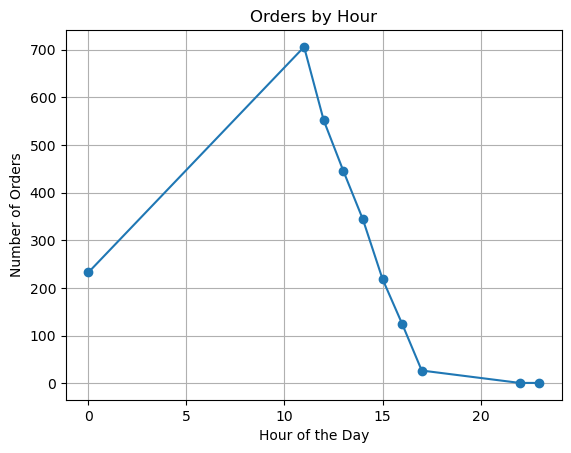

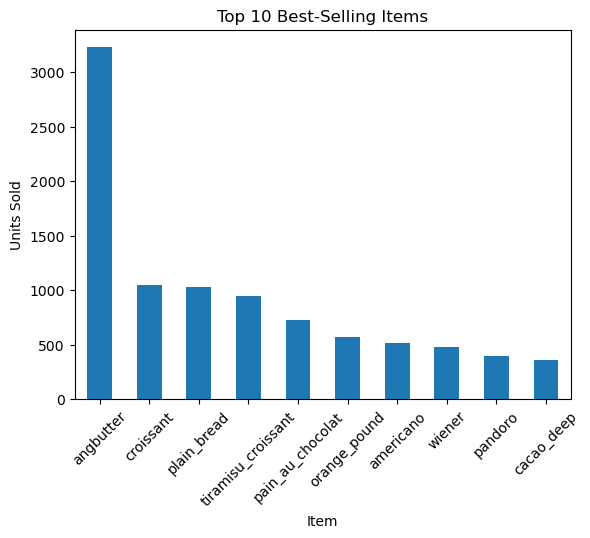

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales distribution by day of the week
sns.barplot(x=orders_by_day.index, y=orders_by_day.values)
plt.title("Orders by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.show()

# Hourly order trends
plt.plot(orders_by_hour.index, orders_by_hour.values, marker='o')
plt.title("Orders by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

# Top selling items
item_sales[:10].plot(kind='bar')
plt.title("Top 10 Best-Selling Items")
plt.xlabel("Item")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.show()
